In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx


def form_pwl_quad(N):
    
    eps = 2**(-N)
    
    x = cvx.Variable(N+1)
    y = cvx.Variable(N+1)

    cst = [
        0 <= x[0],
        x[0] <= eps,
        y[0] >= x[0]*eps,
    ]
    
    for i in range(N):
        delta = eps*(2**i)
        
        cst += [
            x[i] >= cvx.abs(x[i+1] - delta),
            y[i] <= y[i+1] - 2*delta*x[i+1] + delta**2,
        ]        

    return cst, x[-1], y[-1]

In [41]:
N = 10

def make_approx(N):
    cst, y, x = form_pwl_quad(N)
    
    alpha = 1

    def foo(a):
        prob = cvx.Problem(
            cvx.Maximize(alpha*y + (1-alpha)*x),
            cst + [x <= a]
        )

        prob.solve()

        return prob.value
    
    return foo

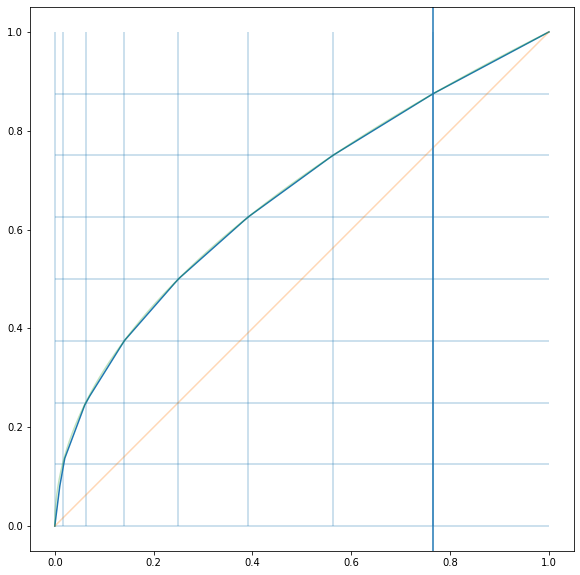

In [190]:
N = 3

foo = make_approx(N)

x = np.linspace(0, 1, 100)
y = [foo(a) for a in x]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.set_aspect('equal')
# ax.grid()
x = np.linspace(0,1,1000)
ax.plot(x,x, alpha=.3)
ax.plot(x,np.sqrt(x), alpha=.3)

ax.vlines(np.arange(0,1,2**(-N))**2, 0, 1, alpha=.3)
ax.hlines(np.arange(0,1,2**(-N)), 0, 1, alpha=.3)

ax.axvline( (1 - 2**(-N))**2 )

fig.savefig('test.png', dpi=200)

In [242]:
N = 8
1 - (1 - 2**(-N))**2

0.0077972412109375

In [245]:
N = np.arange(0,12)*1.0
y = 1 - (1 - 2**(-N))**2

y2 = 2**(-N)

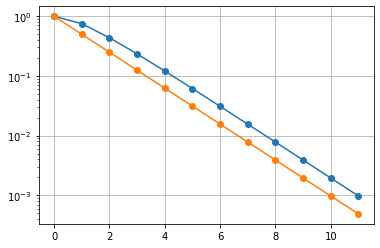

In [250]:
plt.semilogy(N, y, '-o')
plt.semilogy(N, y2, '-o')
plt.grid()

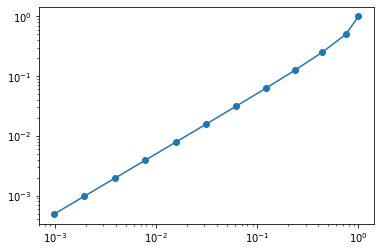

In [247]:
plt.loglog(y, y2, '-o')

# what functional form do we want?

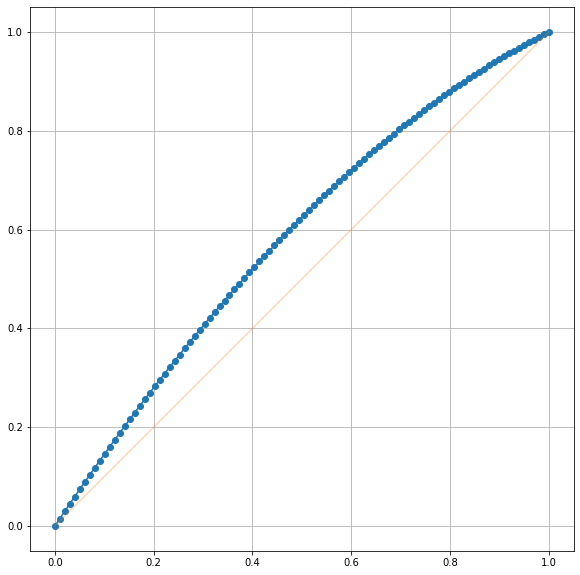

In [235]:
x = np.linspace(0,1,100)

alpha = .5
y = x + alpha*x*(1-x)
# y = 1 + alpha - 2*alpha*x

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, '-o')
ax.set_aspect('equal')

x = np.linspace(0,1,1000)
ax.plot(x,x, alpha=.3)
ax.grid()

/Users/ajfriend/.pyenv/versions/3.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


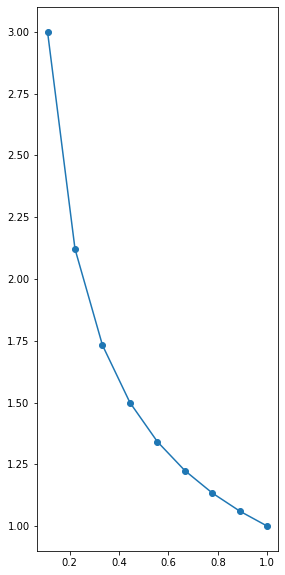

In [186]:
x = np.linspace(0,1,10)
y = x**2

fig, ax = plt.subplots(figsize=(10,10))


a = -.5
ax.plot(x, x**(-.5), '-o')
ax.set_aspect('equal')
# ax.grid()

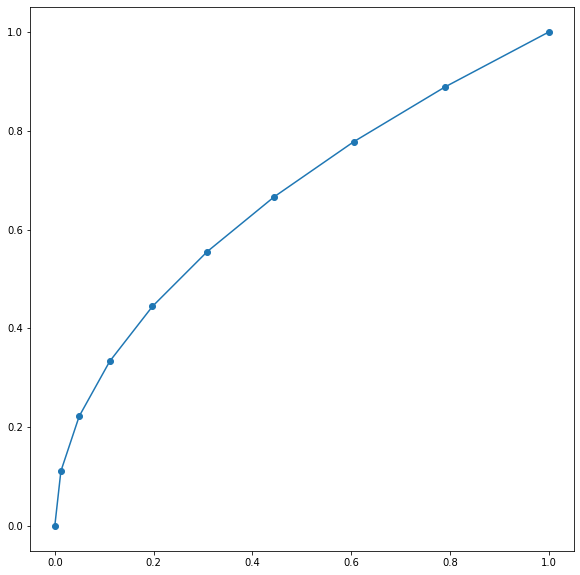

In [161]:
y = np.linspace(0,1,10)
x = y**2

fig, ax = plt.subplots(figsize=(10,10))

alpha = 1

ax.plot(x, alpha*y + (1-alpha)*x, '-o')
ax.set_aspect('equal')
# ax.grid()

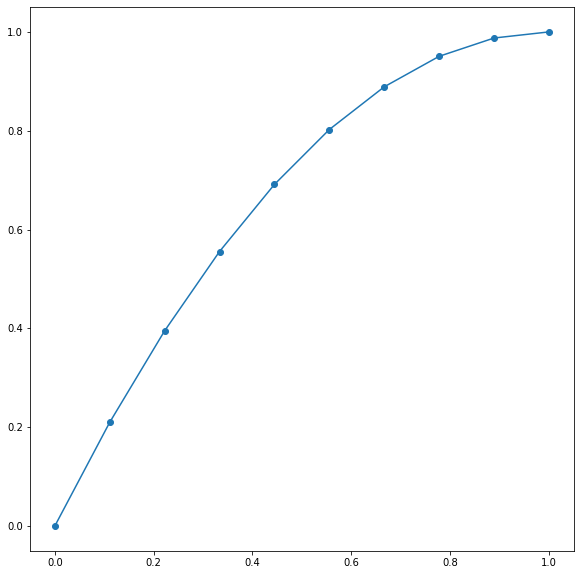

In [175]:
fig, ax = plt.subplots(figsize=(10,10))

alpha = 1

ax.plot(1-y,1-x, '-o')
ax.set_aspect('equal')